In [39]:
#Required Libraries
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# label encoder
from sklearn import preprocessing

#smote
from imblearn.over_sampling import SMOTE
from collections import Counter

# Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# ML model import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# train-test split
from sklearn.model_selection import train_test_split

# Performance 
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Importing data(CSV file)
data = pd.read_csv('D:\Coventry\Bank\Bank.csv')

# Exploratory Data Analysis (EDA)

In [3]:
#Dataframe size
data.shape

(4521, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
#Unique values in variables
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [6]:
#Number of null values in a column
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

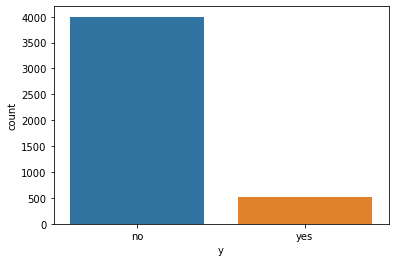

In [7]:
#Target variable count
sns.countplot(data = data, x = 'y')

In [8]:
#Concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#Seperating int64 datatype
data_int = data.select_dtypes(include = ['int64'])
data_int.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [10]:
#Statistical details for numberical variables
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


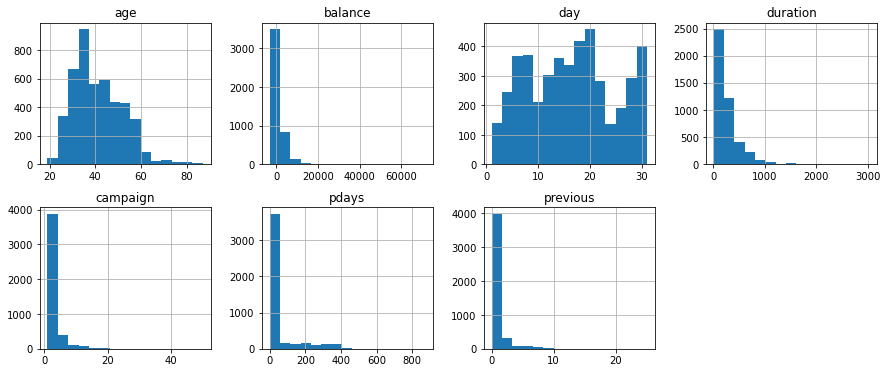

In [11]:
#Histogram plot
data_int.hist(bins=15, figsize=(15, 6), layout=(2, 4));

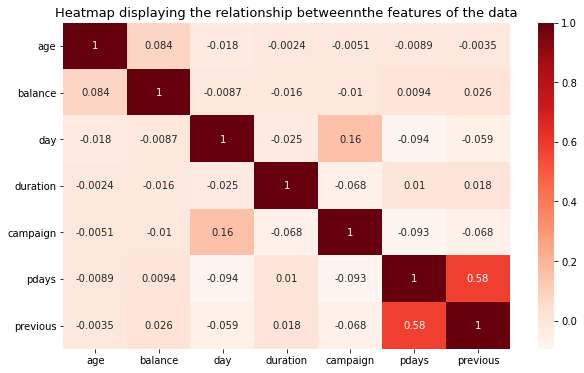

In [12]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

In [13]:
#Seperating object datatype
data_obj = data.select_dtypes(include = ['object'])
data_obj.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [14]:
#Describe categorical variables
data_obj.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


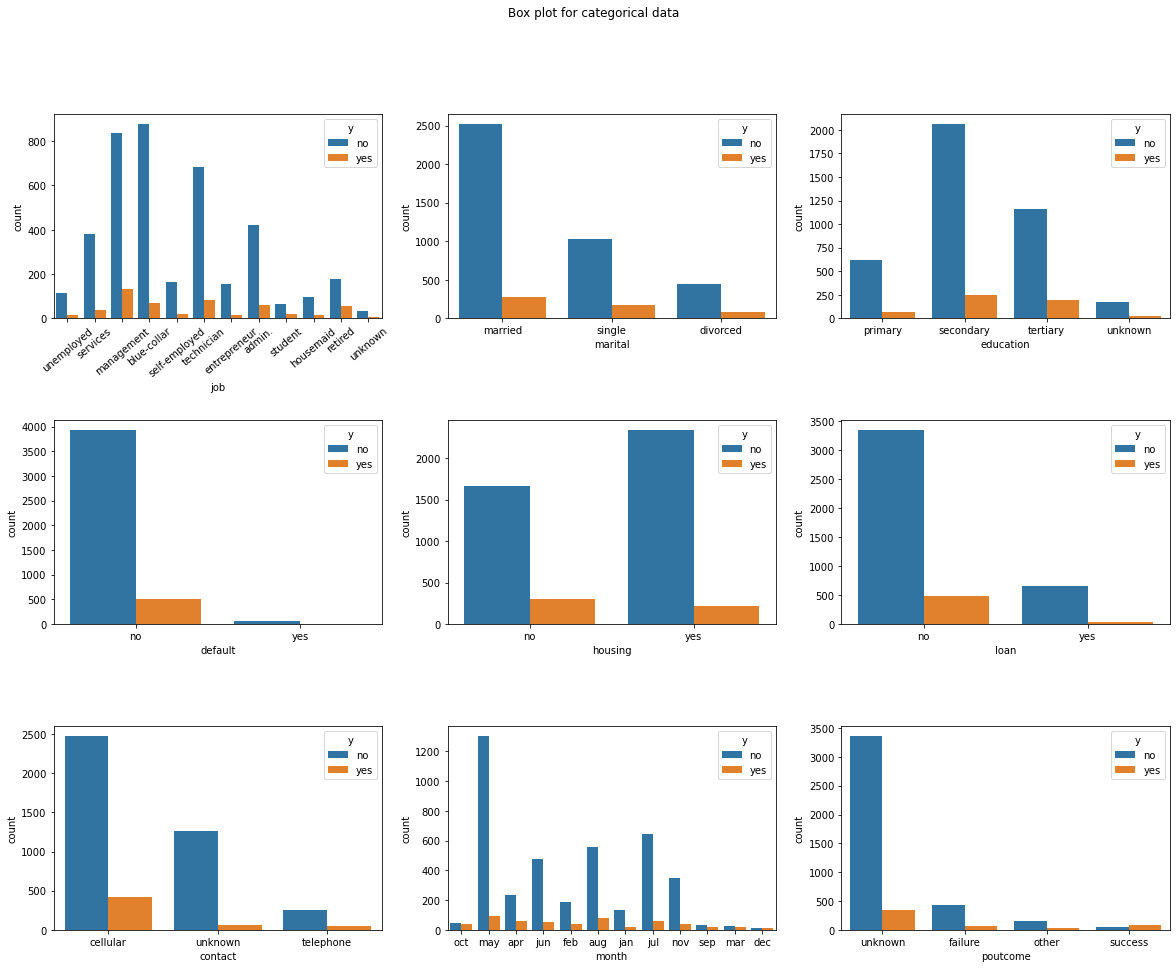

In [15]:
#Box plot
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
  
fig.suptitle('Box plot for categorical data')
  
ax=sns.countplot(ax=axes[0, 0], data=data_obj, x='job', hue='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.countplot(ax=axes[0, 1], data=data_obj, x='marital', hue='y')
sns.countplot(ax=axes[0, 2], data=data_obj, x='education', hue='y')
sns.countplot(ax=axes[1, 0], data=data_obj, x='default', hue='y')
sns.countplot(ax=axes[1, 1], data=data_obj, x='housing', hue='y')
sns.countplot(ax=axes[1, 2], data=data_obj, x='loan', hue='y')
sns.countplot(ax=axes[2, 0], data=data_obj, x='contact', hue='y')
sns.countplot(ax=axes[2, 1], data=data_obj, x='month', hue='y')
sns.countplot(ax=axes[2, 2], data=data_obj, x='poutcome', hue='y')
plt.subplots_adjust(hspace=0.5)

In [16]:
#Yes No class size 
data_no = data[data['y']=='no']
data_yes = data[data['y']=='yes']

print(data_no.shape, data_yes.shape)

(4000, 17) (521, 17)


# Data Preparation

### Label Encoding

In [17]:
#Label Encoding

cols = ['default', 'housing', 'loan', 'y']

def label(cols):
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
    for col in cols:
        data[col] = label_encoder.fit_transform(data[col])
    return(data.head())

In [18]:
label(cols)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


### Ordinal Encoding

In [19]:
# Unique values in variable education
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [20]:
Temp_dic_edu = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
data['education'] = data['education'].map(Temp_dic_edu)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,2,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,3,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,2,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [21]:
# Unique values in variable poutcome
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [22]:
Temp_dic_poc = {"failure": -1, "unknown": 0, "other": 1, "success": 2}
data['poutcome'] = data['poutcome'].map(Temp_dic_poc)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,0,0
1,33,services,married,2,0,4789,1,1,cellular,11,may,220,1,339,4,-1,0
2,35,management,single,3,0,1350,1,0,cellular,16,apr,185,1,330,1,-1,0
3,30,management,married,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,0,0
4,59,blue-collar,married,2,0,0,1,0,unknown,5,may,226,1,-1,0,0,0


In [23]:
# Unique values in variable month
data['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [24]:
Temp_dic_month = {"jan": 1, "feb": 1, "mar": 1, "apr": 2, "may": 2, "jun": 2, "jul": 3, "aug": 3, "sep": 3, "oct": 4, "nov": 4, "dec": 4}
data['quarter'] = data['month'].map(Temp_dic_month)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,quarter
0,30,unemployed,married,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,0,0,4
1,33,services,married,2,0,4789,1,1,cellular,11,may,220,1,339,4,-1,0,2
2,35,management,single,3,0,1350,1,0,cellular,16,apr,185,1,330,1,-1,0,2
3,30,management,married,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,0,0,2
4,59,blue-collar,married,2,0,0,1,0,unknown,5,may,226,1,-1,0,0,0,2


In [25]:
# Dropping month column from the dataset
data = data.drop(['month'],axis=1)

### One Hot encoding

In [26]:
#one-hot encoding
data = pd.get_dummies(data, columns=['job', 'marital', 'contact', 'quarter'] , drop_first=True)
data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,quarter_2,quarter_3,quarter_4
0,30,1,0,1787,0,0,19,79,1,-1,...,0,1,0,1,0,0,0,0,0,1
1,33,2,0,4789,1,1,11,220,1,339,...,0,0,0,1,0,0,0,1,0,0
2,35,3,0,1350,1,0,16,185,1,330,...,0,0,0,0,1,0,0,1,0,0
3,30,3,0,1476,1,1,3,199,4,-1,...,0,0,0,1,0,0,1,1,0,0
4,59,2,0,0,1,0,5,226,1,-1,...,0,0,0,1,0,0,1,1,0,0


In [27]:
# Predictor variables and target variable
x = data.drop(['y'],axis=1)
y = data['y']

# SMOTE

In [28]:
#smote

smote = SMOTE(random_state = 10)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 4000, 1: 521})
Resample dataset shape Counter({0: 4000, 1: 4000})


# Feature selection

In [29]:
#Joining two dataframe x and y 
x_y = pd.concat([x_smote, y_smote], axis=1, join='inner')

### Correlation

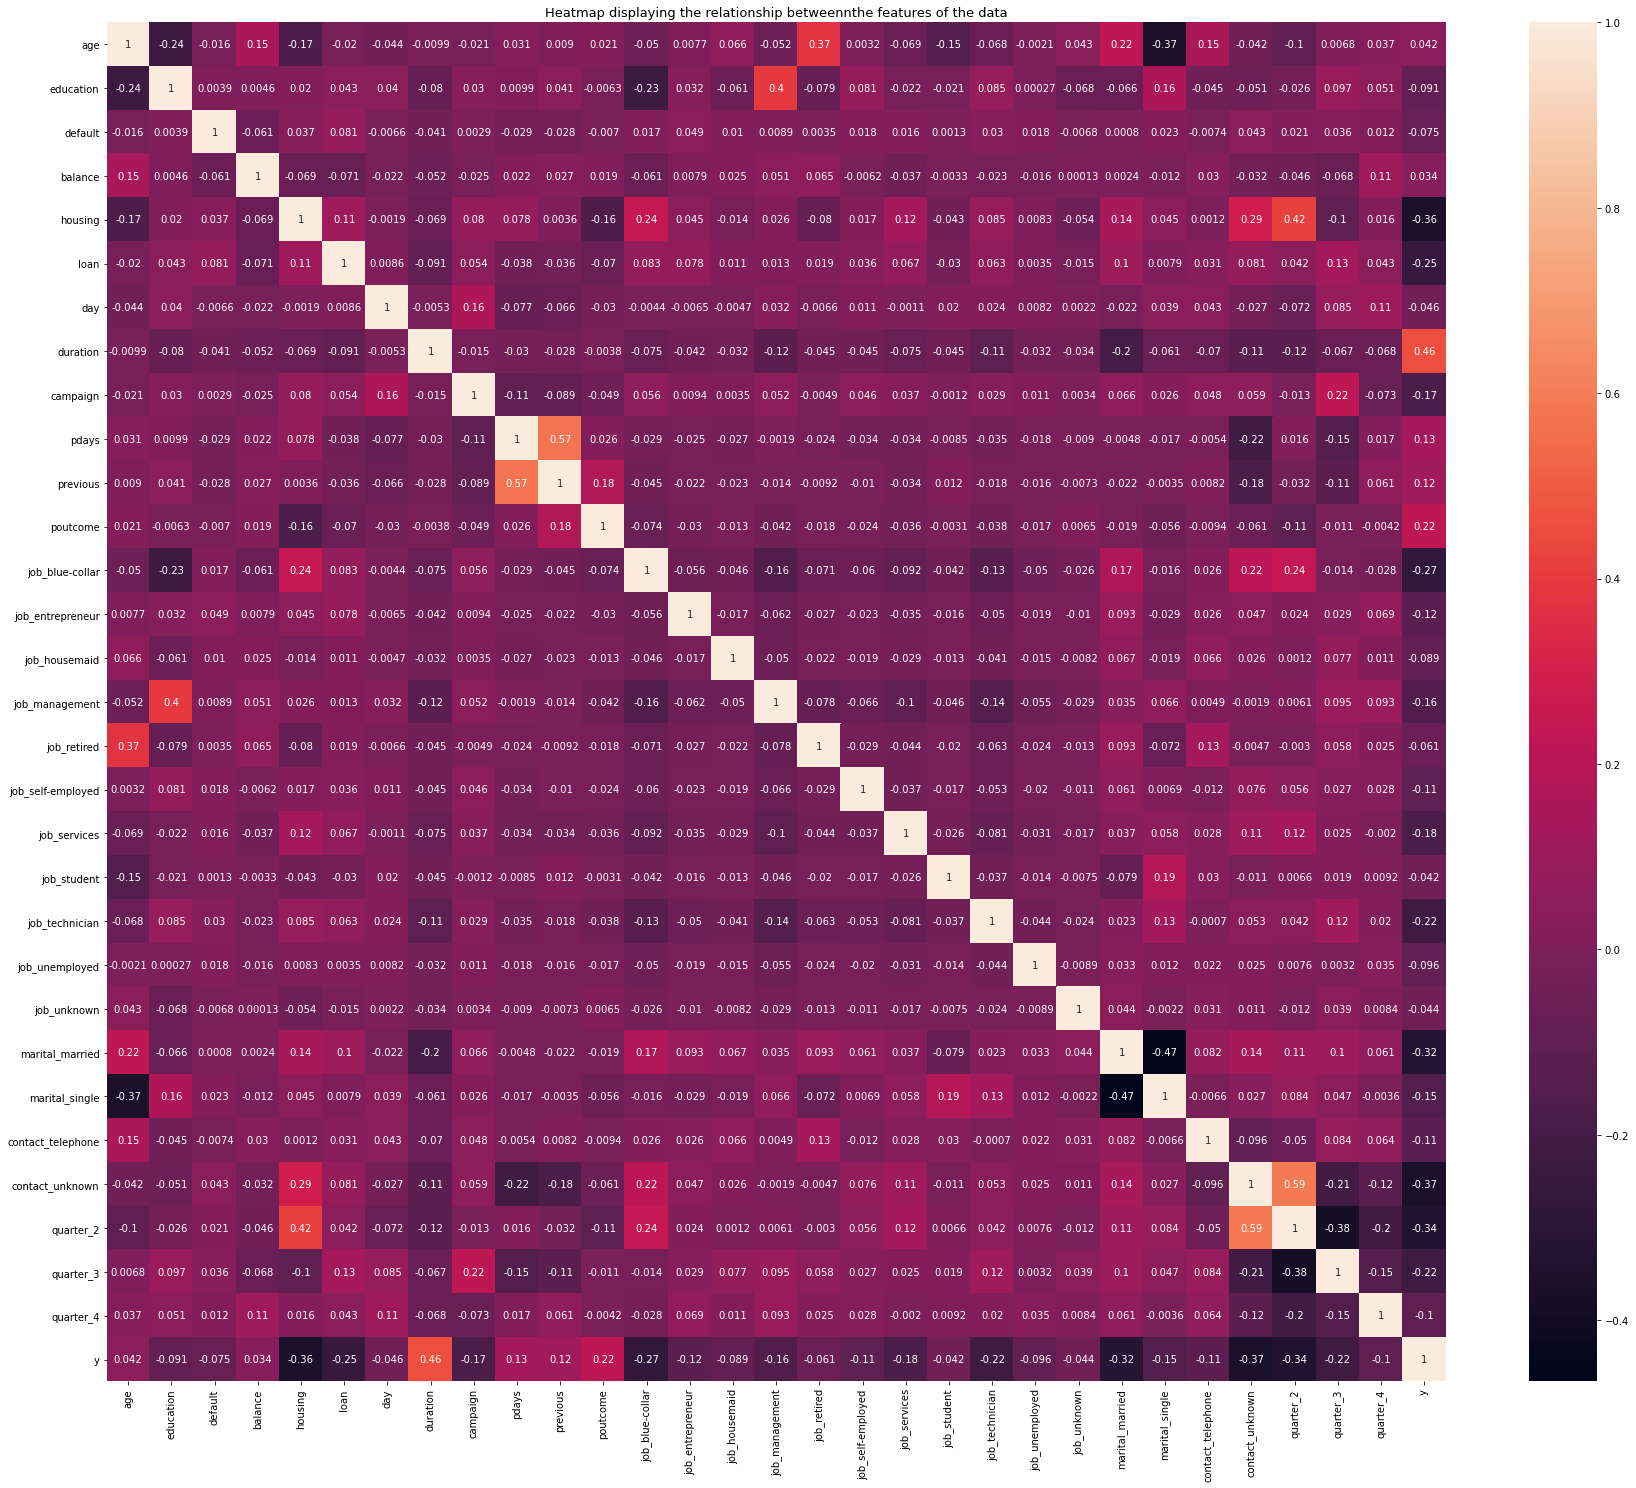

In [30]:
# Feature selection based on Correlation (heatmap)
plt.figure(figsize=(30,25))
sns.heatmap(x_y.corr(), annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

The correlation between previous and pdays are above 0.5 and they have the same 0.13 with the target variable. So we can drop either variable previous or pdays from the dataset. In addition to that, the correlation between quarter_2 and contact_unknown are also 0.5 and contact_unknown has high negative correlation than quarter_2. Therefore, we drop the variable quarter_2.

And there is a negative correlation between marital_single and marital_married. The variable marital_single has less correlation with the target variable we can drop marital_single from the dataset.

Variable (duration) has more correlation with the target variable (y).

In [31]:
# Dropping pdays and marital_single from x_smote dataframe 
x_smote = x_smote.drop(['pdays', 'quarter_2', 'marital_single'],axis=1)

In [32]:
# Shape of X 
x_smote.shape

(8000, 27)

### Forward selection

C:\Users\Johnson\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Johnson\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


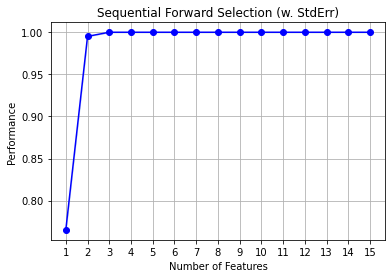

In [33]:
# Forward selection

sfs = SFS(DecisionTreeClassifier(random_state=10),
          k_features=(5,15),
          forward=True,
          floating=False,
          scoring = 'f1',
          cv = 0)
sfs.fit(x_smote, y_smote)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [34]:
sfs.k_feature_names_

('age', 'education', 'balance', 'day', 'duration')

In [35]:
# Predictor variables and target variable
X = x_smote[['age', 'education', 'balance', 'day', 'duration']]
Y = y_smote

In [36]:
X.head()

,age,education,balance,day,duration
0,30,1,1787,19,79
1,33,2,4789,11,220
2,35,3,1350,16,185
3,30,3,1476,3,199
4,59,2,0,5,226


## Train Test Split

In [51]:
# divide into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, train_size = 0.7, random_state = 10, stratify=Y)

### Decision Tree

In [52]:
# creating the decision tree function
model_1 = DecisionTreeClassifier(random_state=10)

#fitting the model
model_1.fit(trainX, trainY)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_1.get_depth())

#checking the training score
print('Accuracy on training: ',model_1.score(trainX, trainY))

#checking the testing score
print('Accuracy on testing: ',model_1.score(testX, testY))

# predict the target on the train dataset
yhat = model_1.predict(testX)

f1 = f1_score(testY.values, yhat, pos_label=0)
print('F1 score on testing: ', f1)

cm = confusion_matrix(testY.values, yhat, labels=[1,0])
print('-------The confusion matrix for this model is-------')
print(cm)

print('\n\n-------Printing the whole report of the model-------')
print(classification_report(testY.values, yhat))

Depth of the Decision Tree:  23
Accuracy on training:  1.0
Accuracy on testing:  0.8108333333333333
F1 score on testing:  0.8051502145922745
-------The confusion matrix for this model is-------
[[1008  192]
 [ 262  938]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1200
           1       0.79      0.84      0.82      1200

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400



In [87]:
k = 10
kf = KFold(n_splits=k, random_state=10, shuffle= True)
model = DecisionTreeClassifier(random_state=10)

result = cross_val_score(model , trainX, trainY, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8019642857142857


    depth  acc_train  acc_test        f1
16   17.0   0.983214  0.818333  0.812069


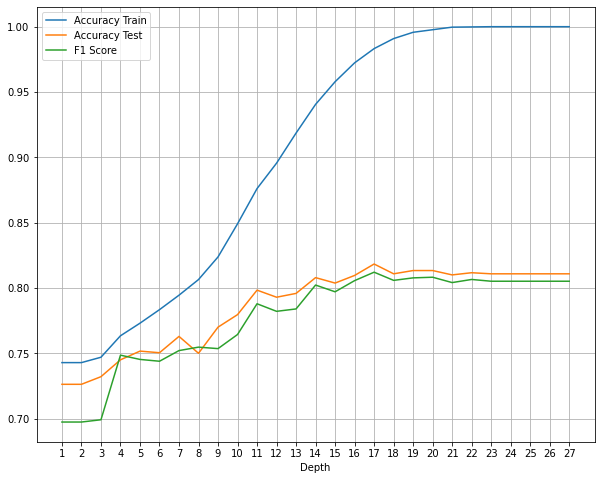

In [53]:
acc_train = []
acc_test = []
depth = []
f1 = []

for x in range(1,28):
  depth.append(x)
  model = DecisionTreeClassifier(random_state=10, max_depth=x)
  model.fit(trainX, trainY)
  # predict the target on the train dataset
  yhat = model.predict(testX)

  f1_s = f1_score(testY.values, yhat, pos_label=0)
  f1.append(f1_s)
  accuracy_train = model.score(trainX, trainY)
  acc_train.append(accuracy_train)
  accuracy_test = model.score(testX, testY)
  acc_test.append(accuracy_test)

df_from_arr = pd.DataFrame(data=[depth, acc_train, acc_test, f1])
values_df = df_from_arr.T
values_df.columns =['depth', 'acc_train', 'acc_test', 'f1']
values_df.sort_values("acc_test", axis = 0, ascending = False,
                 inplace = True)
print(values_df.head(1))

plt.figure(figsize=(10,8))

# plotting
plt.plot(depth, acc_train, label='Accuracy Train')
plt.plot(depth, acc_test, label='Accuracy Test')
plt.plot(depth, f1, label='F1 Score')

# X axis steps
plt.xticks(np.arange(min(depth), max(depth)+1, 1.0))

# grid lines
plt.grid()

# axis labels
plt.xlabel('Depth')

# show the legend
plt.legend()

# show the plot
plt.show()

    Depth      Bias  Variance     Error
20   21.0  0.140417  0.170021  0.222538


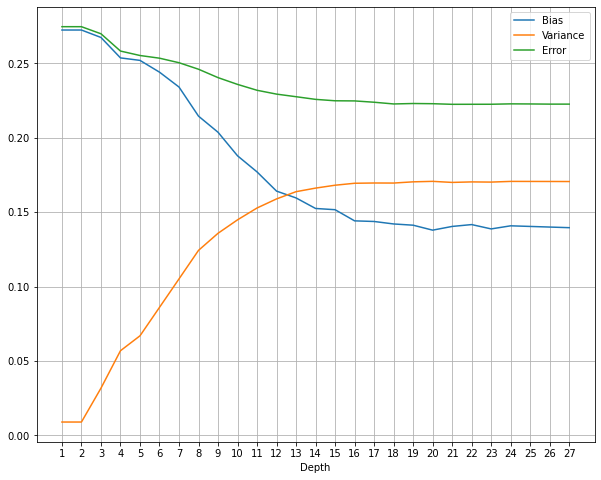

In [55]:
# Bias variance graph 

b = []
v = []
error = []
depth = []

for x in range(1,28):
  depth.append(x)

  model_1 = DecisionTreeClassifier(random_state=10, max_depth=x)
  err, bias, var = bias_variance_decomp(model_1, trainX.values, trainY.values, testX.values, testY.values, loss='0-1_loss', num_rounds=100, random_seed=10)

  b.append(bias)
  v.append(var)
  error.append(err)

df_from_arr = pd.DataFrame(data=[depth, b, v, error])
values_df = df_from_arr.T
values_df.columns =['Depth', 'Bias', 'Variance', 'Error']
values_df.sort_values("Error", axis = 0, ascending = True,
                 inplace = True)
print(values_df.head(1))

plt.figure(figsize=(10,8))

# plotting
plt.plot(depth, b, label='Bias')
plt.plot(depth, v, label='Variance')
plt.plot(depth, error, label='Error')

# X axis steps
plt.xticks(np.arange(min(depth), max(depth)+1, 1.0))

# grid lines
plt.grid()

# axis labels
plt.xlabel('Depth')

# show the legend
plt.legend()

# show the plot
plt.show()

auc score - depth(17) 0.8226003472222223 auc score - depth(21) 0.809725


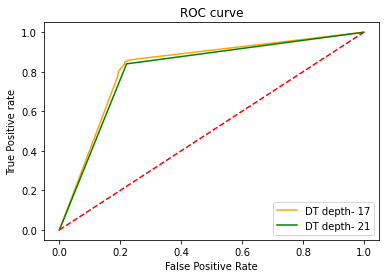

In [58]:
model_1 = DecisionTreeClassifier(random_state=10, max_depth=17)
model_2 = DecisionTreeClassifier(random_state=10, max_depth=21)

model_1.fit(trainX, trainY)
model_2.fit(trainX, trainY)

pred_prob1 = model_1.predict_proba(testX)
pred_prob2 = model_2.predict_proba(testX)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(testY, pred_prob1[:,1])
fpr2, tpr2, thresh2 = roc_curve(testY, pred_prob2[:,1])

random_probs = [0 for i in range(len(testY))]
p_fpr, p_tpr, _ = roc_curve(testY, random_probs)

# auc scores
auc_score1 = roc_auc_score(testY, pred_prob1[:,1])
auc_score2 = roc_auc_score(testY, pred_prob2[:,1])

print('auc score - depth(17) '+ str(auc_score1), 'auc score - depth(21) '+str(auc_score2))

# plot roc curves
plt.plot(fpr1, tpr1, color='orange', label='DT depth- 17')
plt.plot(fpr2, tpr2, color='green', label='DT depth- 21')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
                                
# show the plot
plt.show()

In [88]:
k = 10
kf = KFold(n_splits=k, random_state=10, shuffle= True)

for x in [17, 21]:
    model = DecisionTreeClassifier(random_state=10, max_depth=x)

    result = cross_val_score(model , trainX, trainY, cv = kf)

    print("Avg accuracy for max_depth " +str(x)+": {}".format(result.mean()))

Avg accuracy for max_depth 17: 0.8051785714285714
Avg accuracy for max_depth 21: 0.8017857142857142


# Random Forest

In [59]:
# creating the random forest function
model_1 = RandomForestClassifier(random_state=10)

#fitting the model
model_1.fit(trainX, trainY)

#checking the training score
print('Accuracy on training: ',model_1.score(trainX, trainY))

#checking the testing score
print('Accuracy on testing: ',model_1.score(testX, testY))

# predict the target on the train dataset
yhat = model_1.predict(testX)

f1 = f1_score(testY.values, yhat, pos_label=0)
print('F1 score on testing: ', f1)

cm = confusion_matrix(testY.values, yhat, labels=[1,0])
print('-------The confusion matrix for this model is-------')
print(cm)

print('\n\n-------Printing the whole report of the model-------')
print(classification_report(testY.values, yhat))

Accuracy on training:  1.0
Accuracy on testing:  0.8575
F1 score on testing:  0.8510452961672473
-------The confusion matrix for this model is-------
[[1081  119]
 [ 223  977]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1200
           1       0.83      0.90      0.86      1200

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



In [86]:
#Cross validation accuracy

k = 10
kf = KFold(n_splits=k, random_state=10, shuffle= True)
model = RandomForestClassifier(random_state=10)

result = cross_val_score(model , trainX, trainY, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8530357142857143


    depth  acc_train  acc_test        f1
20   21.0        1.0  0.857917  0.850766


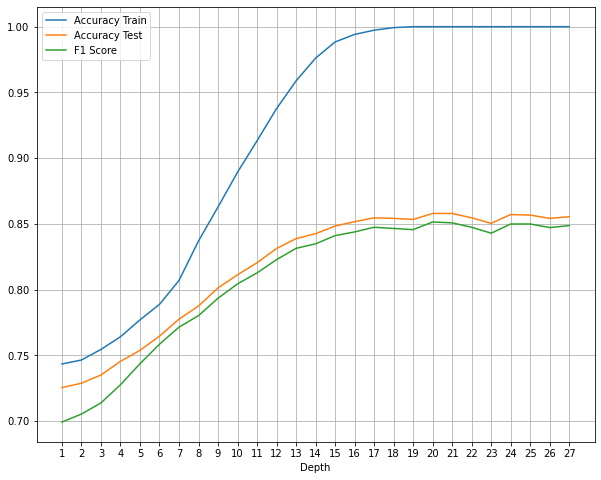

In [60]:
acc_train = []
acc_test = []
depth = []
f1 = []

for x in range(1,28):
  depth.append(x)
  model = RandomForestClassifier(random_state=10, max_depth=x)
  model.fit(trainX, trainY)
  # predict the target on the train dataset
  yhat = model.predict(testX)

  f1_s = f1_score(testY.values, yhat, pos_label=0)
  f1.append(f1_s)
  accuracy_train = model.score(trainX, trainY)
  acc_train.append(accuracy_train)
  accuracy_test = model.score(testX, testY)
  acc_test.append(accuracy_test)

df_from_arr = pd.DataFrame(data=[depth, acc_train, acc_test, f1])
values_df = df_from_arr.T
values_df.columns =['depth', 'acc_train', 'acc_test', 'f1']
values_df.sort_values("acc_test", axis = 0, ascending = False,
                 inplace = True)
print(values_df.head(1))

plt.figure(figsize=(10,8))

# plotting
plt.plot(depth, acc_train, label='Accuracy Train')
plt.plot(depth, acc_test, label='Accuracy Test')
plt.plot(depth, f1, label='F1 Score')

# X axis steps
plt.xticks(np.arange(min(depth), max(depth)+1, 1.0))

# grid lines
plt.grid()

# axis labels
plt.xlabel('Depth')

# show the legend
plt.legend()

# show the plot
plt.show()

    Depth      Bias  Variance     Error
23   24.0  0.147917  0.059563  0.166504


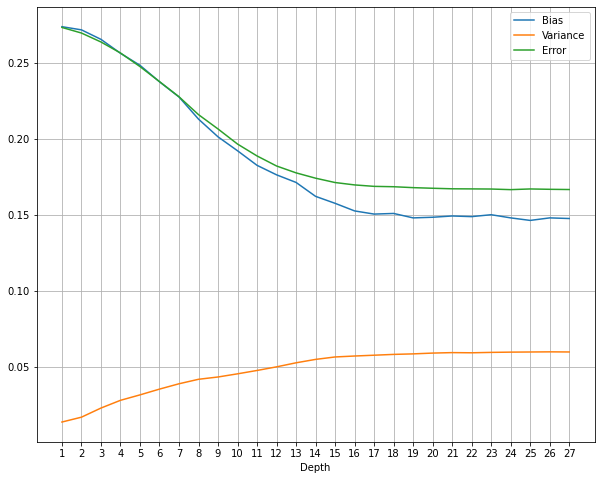

In [61]:
# Bias variance graph 

b = []
v = []
error = []
depth = []

for x in range(1,28):
  depth.append(x)

  model_1 = RandomForestClassifier(random_state=10, max_depth=x)
  err, bias, var = bias_variance_decomp(model_1, trainX.values, trainY.values, testX.values, testY.values, loss='0-1_loss', num_rounds=100, random_seed=10)

  b.append(bias)
  v.append(var)
  error.append(err)

df_from_arr = pd.DataFrame(data=[depth, b, v, error])
values_df = df_from_arr.T
values_df.columns =['Depth', 'Bias', 'Variance', 'Error']
values_df.sort_values("Error", axis = 0, ascending = True,
                 inplace = True)
print(values_df.head(1))

plt.figure(figsize=(10,8))

# plotting
plt.plot(depth, b, label='Bias')
plt.plot(depth, v, label='Variance')
plt.plot(depth, error, label='Error')

# X axis steps
plt.xticks(np.arange(min(depth), max(depth)+1, 1.0))

# grid lines
plt.grid()

# axis labels
plt.xlabel('Depth')

# show the legend
plt.legend()

# show the plot
plt.show()

auc score - depth(21) 0.9313013888888888 auc score - depth(24) 0.9340465277777779


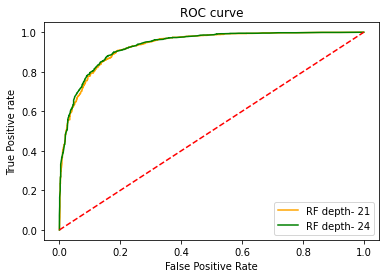

In [62]:
model_1 = RandomForestClassifier(random_state=10, max_depth=21)
model_2 = RandomForestClassifier(random_state=10, max_depth=24)

model_1.fit(trainX, trainY)
model_2.fit(trainX, trainY)

pred_prob1 = model_1.predict_proba(testX)
pred_prob2 = model_2.predict_proba(testX)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(testY, pred_prob1[:,1])
fpr2, tpr2, thresh2 = roc_curve(testY, pred_prob2[:,1])

random_probs = [0 for i in range(len(testY))]
p_fpr, p_tpr, _ = roc_curve(testY, random_probs)

# auc scores
auc_score1 = roc_auc_score(testY, pred_prob1[:,1])
auc_score2 = roc_auc_score(testY, pred_prob2[:,1])

print('auc score - depth(21) '+str(auc_score1), 'auc score - depth(24) '+ str(auc_score2))

# plot roc curves
plt.plot(fpr1, tpr1, color='orange', label='RF depth- 21')
plt.plot(fpr2, tpr2, color='green', label='RF depth- 24')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
                                
# show the plot
plt.show()

In [85]:
k = 10
kf = KFold(n_splits=k, random_state=10, shuffle= True)

for x in [21, 24]:
    model = RandomForestClassifier(random_state=10, max_depth=x)

    result = cross_val_score(model , trainX, trainY, cv = kf)

    print("Avg accuracy for max_depth " +str(x)+": {}".format(result.mean()))

Avg accuracy for max_depth 21: 0.8530357142857143
Avg accuracy for max_depth 24: 0.8492857142857144


# KNN

In [63]:
# creating the KNN function
model_2 = KNeighborsClassifier()

#fitting the model
model_2.fit(trainX, trainY)

#checking the training score
print('Accuracy on training: ',model_2.score(trainX, trainY))

#checking the testing score
print('Accuracy on testing: ',model_2.score(testX, testY))

# predict the target on the train dataset
yhat = model_2.predict(testX)

f1 = f1_score(testY.values, yhat, pos_label=0)
print('F1 score on testing: ', f1)

cm = confusion_matrix(testY.values, yhat, labels=[1,0])
print('-------The confusion matrix for this model is-------')
print(cm)

print('\n\n-------Printing the whole report of the model-------')
print(classification_report(testY.values, yhat))

Accuracy on training:  0.8766071428571428
Accuracy on testing:  0.8058333333333333
F1 score on testing:  0.7891402714932128
-------The confusion matrix for this model is-------
[[1062  138]
 [ 328  872]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1200
           1       0.76      0.89      0.82      1200

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.80      2400
weighted avg       0.81      0.81      0.80      2400



The KNN model didn't overfit the training data.

In [82]:
k = 10
kf = KFold(n_splits=k, random_state=10, shuffle= True)
model = KNeighborsClassifier()

result = cross_val_score(model , trainX, trainY, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8142857142857143


   neighbors  acc_train  acc_test        f1
0        1.0        1.0   0.82875  0.816927


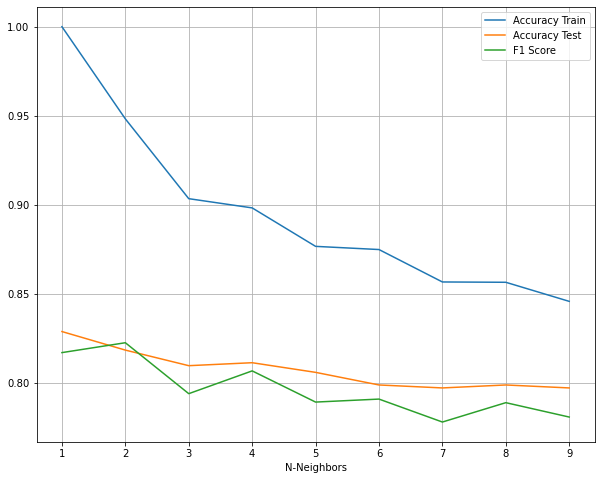

In [64]:
acc_train = []
acc_test = []
neighbors = []
f1 = []

for x in range(1,10):
  neighbors.append(x)
  model = KNeighborsClassifier(n_neighbors=x) 
  model.fit(trainX, trainY)
  # predict the target on the train dataset
  yhat = model.predict(testX)

  f1_s = f1_score(testY.values, yhat, pos_label=0)
  f1.append(f1_s)
  accuracy_train = model.score(trainX, trainY)
  acc_train.append(accuracy_train)
  accuracy_test = model.score(testX, testY)
  acc_test.append(accuracy_test)

df_from_arr = pd.DataFrame(data=[neighbors, acc_train, acc_test, f1])
values_df = df_from_arr.T
values_df.columns =['neighbors', 'acc_train', 'acc_test', 'f1']
values_df.sort_values("acc_test", axis = 0, ascending = False,
                 inplace = True)
print(values_df.head(1))

plt.figure(figsize=(10,8))

# plotting
plt.plot(neighbors, acc_train, label='Accuracy Train')
plt.plot(neighbors, acc_test, label='Accuracy Test')
plt.plot(neighbors, f1, label='F1 Score')

# X axis steps
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))

# grid lines
plt.grid()

# axis labels
plt.xlabel('N-Neighbors')

# show the legend
plt.legend()

# show the plot
plt.show()

   Neighbors     Bias  Variance     Error
0        1.0  0.17125  0.068446  0.190788


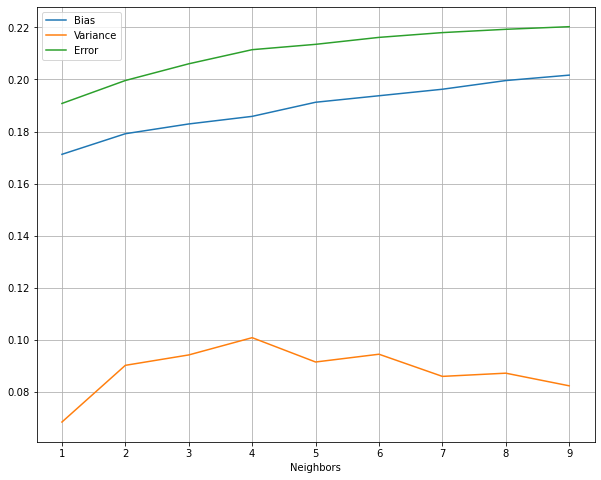

In [66]:
# Bias variance graph 

b = []
v = []
neighbors = []
error = []

for x in range(1,10):
  neighbors.append(x)

  model_2 = KNeighborsClassifier(n_neighbors=x) 
  err, bias, var = bias_variance_decomp(model_2, trainX.values, trainY.values, testX.values, testY.values, loss='0-1_loss', num_rounds=100, random_seed=10)

  b.append(bias)
  v.append(var)
  error.append(err)

df_from_arr = pd.DataFrame(data=[neighbors, b, v, error])
values_df = df_from_arr.T
values_df.columns =['Neighbors', 'Bias', 'Variance', 'Error']
values_df.sort_values("Error", axis = 0, ascending = True,
                 inplace = True)
print(values_df.head(1))

plt.figure(figsize=(10,8))

# plotting
plt.plot(neighbors, b, label='Bias')
plt.plot(neighbors, v, label='Variance')
plt.plot(neighbors, error, label='Error')

# X axis steps
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))

# grid lines
plt.grid()

# axis labels
plt.xlabel('Neighbors')

# show the legend
plt.legend()

# show the plot
plt.show()

Here the error increase with increase in K-Neighbors.

Neighbots 1 :0.82875 
Neighbots 3 :0.8728631944444443 
Neighbots 7 :0.8749496527777778


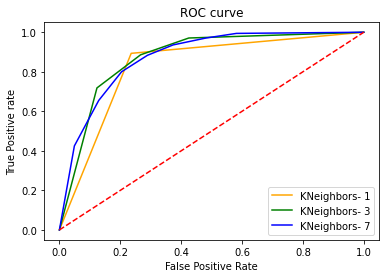

In [79]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_2 = KNeighborsClassifier(n_neighbors=3)
model_3 = KNeighborsClassifier(n_neighbors=7)

model_1.fit(trainX, trainY)
model_2.fit(trainX, trainY)
model_3.fit(trainX, trainY)

pred_prob1 = model_1.predict_proba(testX)
pred_prob2 = model_2.predict_proba(testX)
pred_prob3 = model_3.predict_proba(testX)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(testY, pred_prob1[:,1])
fpr2, tpr2, thresh2 = roc_curve(testY, pred_prob2[:,1])
fpr3, tpr3, thresh3 = roc_curve(testY, pred_prob3[:,1])

random_probs = [0 for i in range(len(testY))]
p_fpr, p_tpr, _ = roc_curve(testY, random_probs)

# auc scores
auc_score1 = roc_auc_score(testY, pred_prob1[:,1])
auc_score2 = roc_auc_score(testY, pred_prob2[:,1])
auc_score3 = roc_auc_score(testY, pred_prob3[:,1])

print('Neighbots 1 :'+str(auc_score1),'\n' 'Neighbots 3 :'+str(auc_score2),'\n' 'Neighbots 7 :'+str(auc_score3))

# plot roc curves
plt.plot(fpr1, tpr1, color='orange', label='KNeighbors- 1')
plt.plot(fpr2, tpr2, color='green', label='KNeighbors- 3')
plt.plot(fpr3, tpr3, color='blue', label='KNeighbors- 7')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
                                
# show the plot
plt.show()

In [84]:
k = 10
kf = KFold(n_splits=k, random_state=10, shuffle= True)

for x in [1,3,7]:
    model = KNeighborsClassifier(n_neighbors=x)

    result = cross_val_score(model , trainX, trainY, cv = kf)

    print("Avg accuracy for " +str(x)+" neighbors: {}".format(result.mean()))

Avg accuracy for 1 neighbors: 0.8391071428571429
Avg accuracy for 3 neighbors: 0.8258928571428571
Avg accuracy for 7 neighbors: 0.8099999999999999
